PROYEK DATA ANALIS : E-COMMERCE PUBLIC DATA\
NAMA : **HILMA FADIYA SUBEKTI** \
EMAIL : hilma.fadiyas@gmail.com\
ID Dicoding : hilma_fadiya

Menentukan Pertanyaan Bisnis




*  Bagaimana tingkat kepuasan pelanggan terhadap layanan e-commerce berdasarkan ulasan produk?
* Bagaimana pesebaran daerah penjual?
* Bagaimana persebaran daerah pelanggan?
* Apakah peserbaran daerah penjual sama dengan pelanggan?

Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Berikut merupakan Data Pelanggan

In [3]:
customers= pd.read_csv('/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Berikut merupakan Data Penjual

In [4]:
sellers = pd.read_csv('/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Berikut merupakan Data Riview

In [5]:
review = pd.read_csv('/content/drive/MyDrive/E-commerce-public-dataset/E-Commerce Public Dataset/order_reviews_dataset.csv')
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Selanjutnya, akan diambil kolom-kolom data yang diperlukan

In [6]:
customer1 = customers[["customer_id","customer_state"]]
customer1.head()

,customer_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP
1,18955e83d337fd6b2def6b18a428ac77,SP
2,4e7b3e00288586ebd08712fdd0374a03,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP


In [7]:
seller1 = sellers[["seller_id","seller_state"]]
seller1.head()

,seller_id,seller_state
0,3442f8959a84dea7ee197c632cb2df15,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,SP


In [8]:
review1 = review[["review_id","review_score"]]
review1.head()

,review_id,review_score
0,7bc2406110b926393aa56f80a40eba40,4
1,80e641a11e56f04c1ad469d5645fdfde,5
2,228ce5500dc1d8e020d8d1322874b6f0,5
3,e64fb393e7b32834bb789ff8bb30750e,5
4,f7c4243c7fe1938f181bec41a392bdeb,5


In [9]:
merged_df = pd.merge(customer1, seller1, how='left', left_on='customer_state', right_on='seller_state')

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85687353 entries, 0 to 85687352
Data columns (total 4 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   customer_id     object
 1   customer_state  object
 2   seller_id       object
 3   seller_state    object
dtypes: object(4)
memory usage: 3.2+ GB


In [11]:
merged_df.head()

,customer_id,customer_state,seller_id,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP,3442f8959a84dea7ee197c632cb2df15,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,SP,d1b65fc7debc3361ea86b5f14c68d2e2,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,SP,c0f3eea2e14555b6faeea3dd58c1b1c3,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,SP,51a04a8a6bdcb23deccc82b0b80742cf,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,SP,1b938a7ec6ac5061a66a3766e0e75f90,SP


In [12]:
review1['review_id'] = review1['review_id'].astype(str)
review1['review_score'] = review1['review_score'].astype(str)

<ipython-input-12-729ca02317f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review1['review_id'] = review1['review_id'].astype(str)
<ipython-input-12-729ca02317f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review1['review_score'] = review1['review_score'].astype(str)


##Assessing Data

In [13]:
customer1.isnull().sum()

customer_id       0
customer_state    0
dtype: int64

In [14]:
seller1.isnull().sum()

seller_id       0
seller_state    0
dtype: int64

In [15]:
review1.isnull().sum()

review_id       0
review_score    0
dtype: int64

In [16]:
customer1.duplicated().sum()

0

In [17]:
seller1.duplicated().sum()

0

In [18]:
review1.duplicated().sum()

814

##Cleaning Data (Menghapus Data Duplikat pad Review1)

In [19]:
review1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   review_score  99224 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [20]:
print('\n', review1.describe(include='all'))


                                review_id review_score
count                              99224        99224
unique                             98410            5
top     7b606b0d57b078384f0b58eac1d41d78            5
freq                                   3        57328


In [21]:
review2 = review1.drop_duplicates(subset=['review_id'])

In [22]:
review2.duplicated().sum()

0

In [23]:
review2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98410 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     98410 non-null  object
 1   review_score  98410 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


##Exploratory Data Analysis (EDA)

In [24]:
print('\n', customer1.describe(include='all'))


                              customer_id customer_state
count                              99441          99441
unique                             99441             27
top     06b8999e2fba1a1fbc88172c00ba8bc7             SP
freq                                   1          41746


In [25]:
print('\n', seller1.describe(include='all'))


                                seller_id seller_state
count                               3095         3095
unique                              3095           23
top     3442f8959a84dea7ee197c632cb2df15           SP
freq                                   1         1849


In [26]:
print('\n', review2.describe(include='all'))


                                review_id review_score
count                              98410        98410
unique                             98410            5
top     7bc2406110b926393aa56f80a40eba40            5
freq                                   1        56910


##Visualisasi Data

##PERTANYAAN 1 : Bagaimana tingkat kepuasan pelanggan terhadap layanan e-commerce berdasarkan ulasan produk?

<ipython-input-27-606237bd522d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pm = sns.barplot(x=review_scores.index,


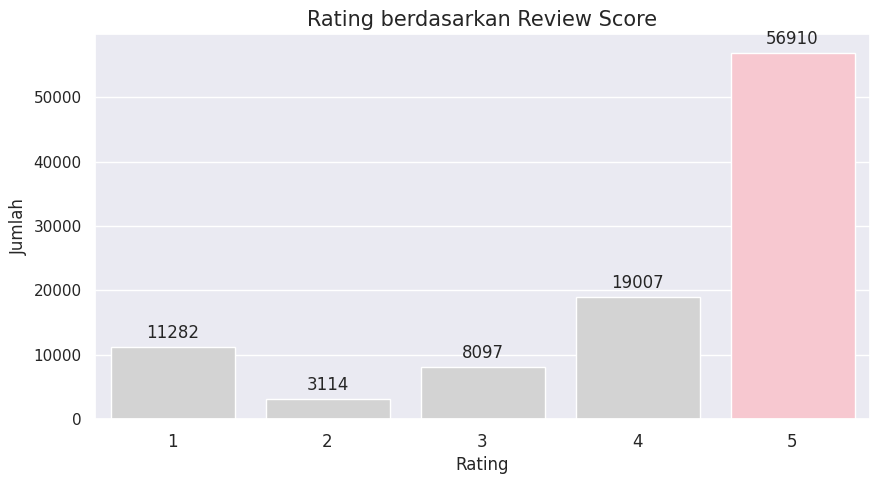

In [27]:
review_scores = review2['review_score'].value_counts().sort_index()

most_common_score = review_scores.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
pm = sns.barplot(x=review_scores.index,
                 y=review_scores.values,
                 palette=["pink" if score == most_common_score else "#D3D3D3" for score in review_scores.index]
                 )

plt.title("Rating berdasarkan Review Score", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.xticks(fontsize=12)
for p in pm.patches:
    pm.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Berdasarkan grafik diatas menunjukkan bahwa pelanggan sangat puas dengan layanan e-coomerce. Hal tersebut terbukti dengan jumlah pelanggan yang memberikan rating 5 tertinggi dibandingkan dengan rating lainnya

##PERTANYAAN 2 : Bagaimana persebaran lokasi pelanggan?

In [28]:
bystate_df = customer1.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df.head()

,customer_state,customer_count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380


<ipython-input-29-88d409f153f8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state',


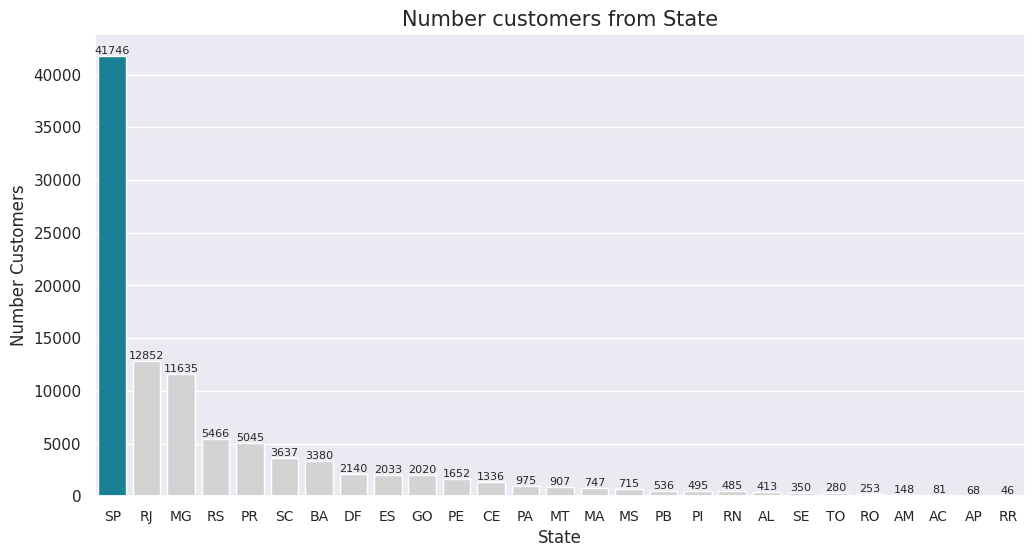

In [29]:
plt.figure(figsize=(12, 6))

most_common_state = bystate_df.loc[bystate_df['customer_count'].idxmax(), 'customer_state']

bystate_df = bystate_df.sort_values(by='customer_count', ascending=False)

sns.barplot(x='customer_state',
            y='customer_count',
            data=bystate_df,
            palette=["#068DA9" if state == most_common_state else "#D3D3D3" for state in bystate_df['customer_state']]
            )

plt.title("Number customers from State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number Customers")
plt.xticks(fontsize=10)

# Menambahkan label jumlah pelanggan pada setiap bar
for index, value in enumerate(bystate_df['customer_count']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=8)

plt.show()


Berdasarkan grafik diatas dapat disimpulkan daerah dengan pelanggan terbanyak yaitu daerah SP dengan jumlah 41746 pelanggan.

## PERTANYAAN 3 : Bagaimana Persebaran Daerah Penjual?

In [30]:
bystate1_df = seller1.groupby(by="seller_state").seller_id.nunique().reset_index()
bystate1_df.rename(columns={"seller_id": "seller_count"}, inplace=True)
bystate1_df.head()

,seller_state,seller_count
0,AC,1
1,AM,1
2,BA,19
3,CE,13
4,DF,30


<ipython-input-31-8812305ed68c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_state',


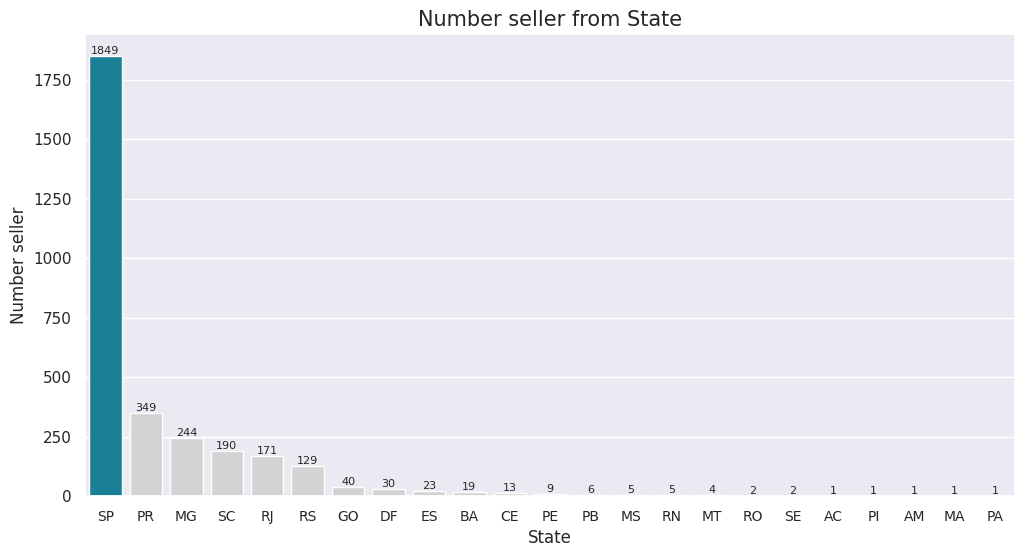

In [31]:
plt.figure(figsize=(12, 6))

# Mencari state dengan jumlah penjual terbanyak
most_common_state = bystate1_df.loc[bystate1_df['seller_count'].idxmax(), 'seller_state']

# Mengurutkan bystate1_df berdasarkan jumlah penjual
bystate1_df = bystate1_df.sort_values(by='seller_count', ascending=False)

sns.barplot(x='seller_state',
            y='seller_count',
            data=bystate1_df,
            palette=["#068DA9" if state == most_common_state else "#D3D3D3" for state in bystate1_df['seller_state']]
            )

plt.title("Number seller from State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number seller")
plt.xticks(fontsize=10)

# Menambahkan label jumlah penjual pada setiap bar
for index, value in enumerate(bystate1_df['seller_count']):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=8)

plt.show()


Berdasarkan grafik diatas dapat disimpulkan persebaran data penjual terbanyak di daerah SP dengan jumlah 1849 penjual.

## Conclusion

Dengan demikian dapat disimpulkan bahwa pelanggan sangat puas dengan pelayanan e-commerse. Disisi lain, daerah persebaran terbesar pelanggan maupun penjual pada daerah yang sama yaitu SP. Oleh karena itu, untuk meningkatkan kepuasan pelanggan kedepannya dapat dilakukan penyebaran daerah penjual agar daerah pelanggan juga lebih tersebar didaeran lain.

In [33]:
merged_df.to_csv('merged_df.csv', index=False)